# <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/X.Example_Files/Images/Lightbulb.png?raw=true" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%"> Sampling </span> </div>

## <span style="color:#00a0e4;"> Keywords: </span>

```Time Sampling```, ```Real-Time Acquisition Systems```, ```Embedded Systems```

# I. Introduction
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;"> 1. Background </div>


Any physical quantity that varies with time, space or any independent variable is known as a signal. As they exist in the world, signals have a representation in any infinitely small portion of time, and for that reason are designated as continuous signals. The process of reducing a continuous signal to a discrete signal is defined as sampling, and has the goal of retrieving a digitally manageable sequence of quantities spaced of a pre-defined time interval. <br>
In this lesson we will make a series of experiments to understand this fundamental process.

<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/X.Example_Files/Images/C.Signal_Processing_IMG/C003/signal_sampling.pdf?raw=true" width=200/>

## <div style="color:#00a0e4;"> 2. Objectives</div>
* Setup a skeleton data acquisition system with adjustable sampling rate
* Understand the importance of timmings in embedded systems
* Learn how to profile the behaviour of your programs

## <div style="color:#00a0e4;"> 3. Materials </div>
* MArduino IDE
* 1x Arduino Uno
* 1x USB cable
* 1x Breadboard
* 1x Potentiometer
* 1x Temperature sensor
* 3x Jumper wires

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
    Unless otherwise noticed make sure that you use a 115200bps baud rate
throughout the following experiments.      
</div>

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;">  1. Barebone Real-Time Acquisition System </div>

Whether it is to save resources (e.g. storage space, computing time, power), or to have more precise information when analyzing the data once collected, an important component in most biomedical applications involving signals is the control of the data acquisition settings. The most basic setting is determining when the process starts or stop. Given that in the digital domain signals are treated as sequences of quantities spaced of a pre-defined time interval, specifying the later is also of utmost importance. In this experiment you will implement a simple data acquisition system with configurable settings.

    1. Take the breadboard, the potentiometer and the jumper wires, and connect them to your Arduino

        Reading a voltage with the Arduino:
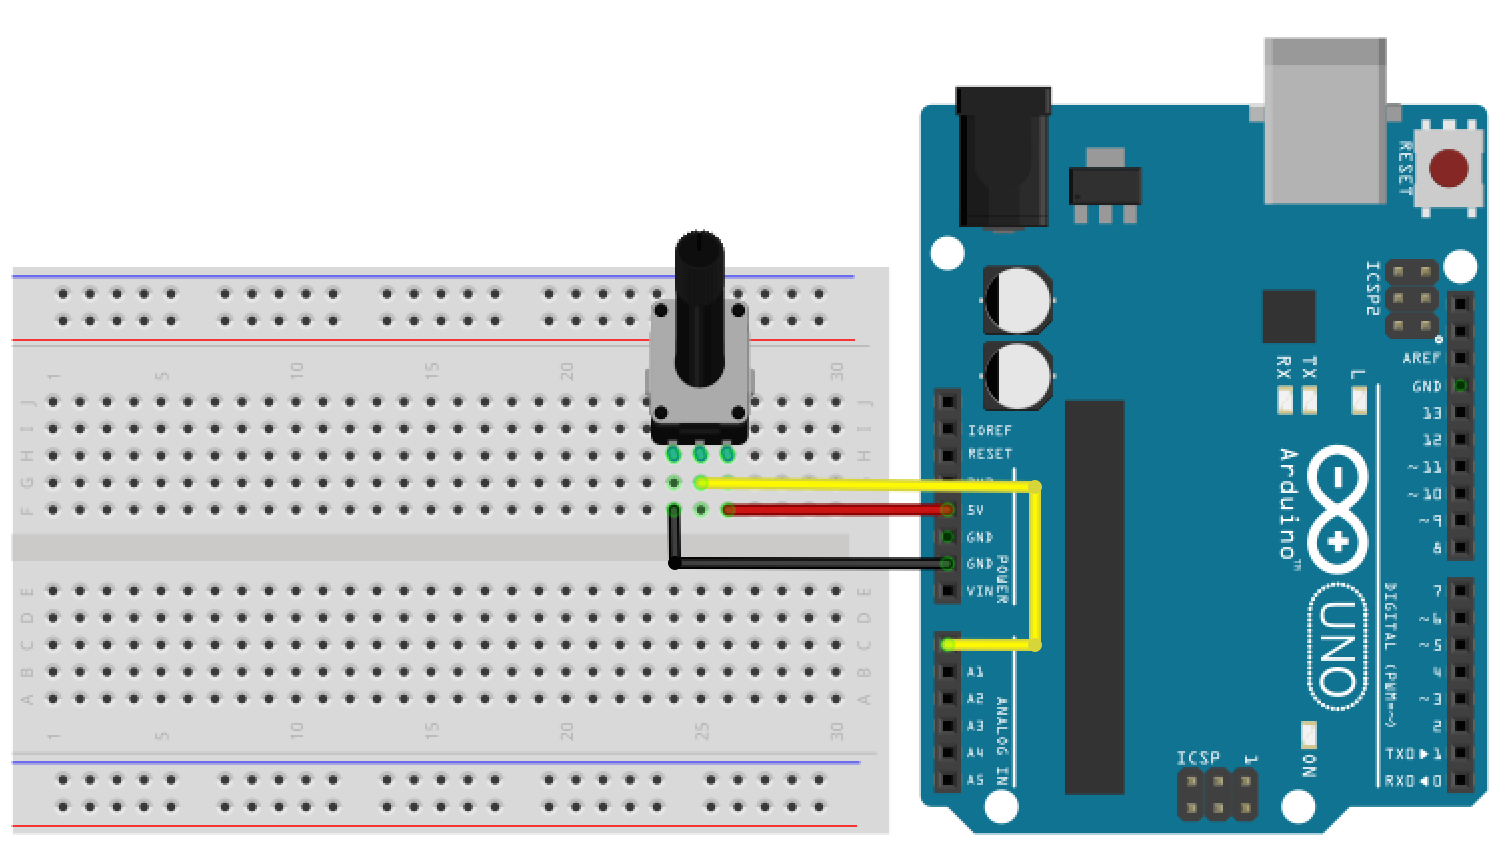

    2. Create a new (empty) sketch on the Arduino IDE

    3. Write a program that starts or stops real-time data streaming of the analog values read from an input channel of your choice via the serial port, in response to commands received from the computer through the serial port (e.g. B starts the acquisition and E stops it)

    4. In addition to controlling the acquisition state, add a feature to your pro- gram to allow the configuration of 
    the sampling rate (i.e. time in-between reading a sample from the analog input), by receiving a command followed by a number indicating the desired sampling rate (e.g. F followed by 10 should configure the system to use a sampling rate of 10Hz); note that your program should not allow adjusting the sampling while the device is streaming data     (otherwise the time in-between samples will not be the same throughout the recording)

    5. Compile and upload the sketch to your Arduino board

    6. Open the Serial Monitor tool from the Arduino IDE

    7. Try out your code and confirm that the implemented commands are working as expected; changing the resistance on 
    the potentiometer should vary the input voltage reaching the analog input being sampled and consequently make the 
    analog codes produced by the ADC change also

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    In practice, the time in-between acquired samples is controlled by al-
lowing the analogRead() to be executed only at a certain time. For simplicity, you can achieve this using the delay() function to force the code to stop for a period of time compatible with the specified sampling rate.    
</div>

## <div style="color:#00a0e4;">  2. Time is Not Always What We Think </div>

We have talked about time a fair amount by now, but haven’t really analyzed
it still. In this experiment we will look into the dynamics of time at a more
granular level, and understand why we should look beyond our presumptions.

    1. Adapt the code developed in the previous section to stream the return value of the millis() function together with the  analog inputeading, as a formatted set of strings with comma-separated values (CSV) (e.g. MILLIS,A0); make sure that each string is ended by a line feed character

    2. Compile and upload the sketch to your Arduino board
    3. Open the Serial Monitor tool from the Arduino IDE
    4. Configure the sampling rate that your device will use to 1Hz
    5. Start the data acquisition and stop it after a couple of seconds
    6. Select all the content of the Serial Monitor window and copy it
    7. Open a spreadsheet software of your choice and paste the copied data (if the data is not automatically split into columns use the Data > Text to columns... option)
    8. Create a new column with the discrete derivative of your time column (i.e. each element is computed as the 
    difference  between two consecutive time samples)
    9. Compute the maximum, minimum and average values of the discrete derivative column; while the mimimum value should match the expected inter-sample interval of 1 second imposed by the 1Hz sampling rate you have configured (and the     average should be close to it), the maximum value shows us that sometimes the process takes more or less time; in effect, there are other factors influencing the MCU, preventing it from meeting our time constrains and making what  we would otherwise think to be a known time in-between samples have an uncertainty

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    There are several factors that can cause delays in the execution of your
code. The main factors are the time taken by the instructions themselves
to complete (e.g. writting a long to the serial port using the default
Arduino libraries and approach takes around 420 μseconds)     
</div>

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    In addition to the millis() function, the Arduino also has the micros()
function, which enables us to analyze time with higher granularity:
https://www.arduino.cc/reference/en/language/functions/time/micros/    
</div>

## <div style="color:#00a0e4;">   3. Any Configuration has Limits </div>

Although modern digital systems (and in most cases our presumptions) may
lead us to think otherwise, due to the increasingly commoditized availability of
resources (e.g. processor speed, memory, etc.), the same are not unlimited. This
is particularly noticeable in embedded systems, and even the most seemingly
harmful changes can have a big impact on the results we obtain (or on that we
think we obtain at least). In this experiment we will see how even changing the
type of data being transmitted can be the difference between a tip-top system
and a dud.

    1. Take the breadboard, the temperature sensor and the jumper wires, and connect them to your Arduino

        Reading a temperature with a TMP36 sensor on the Arduino:
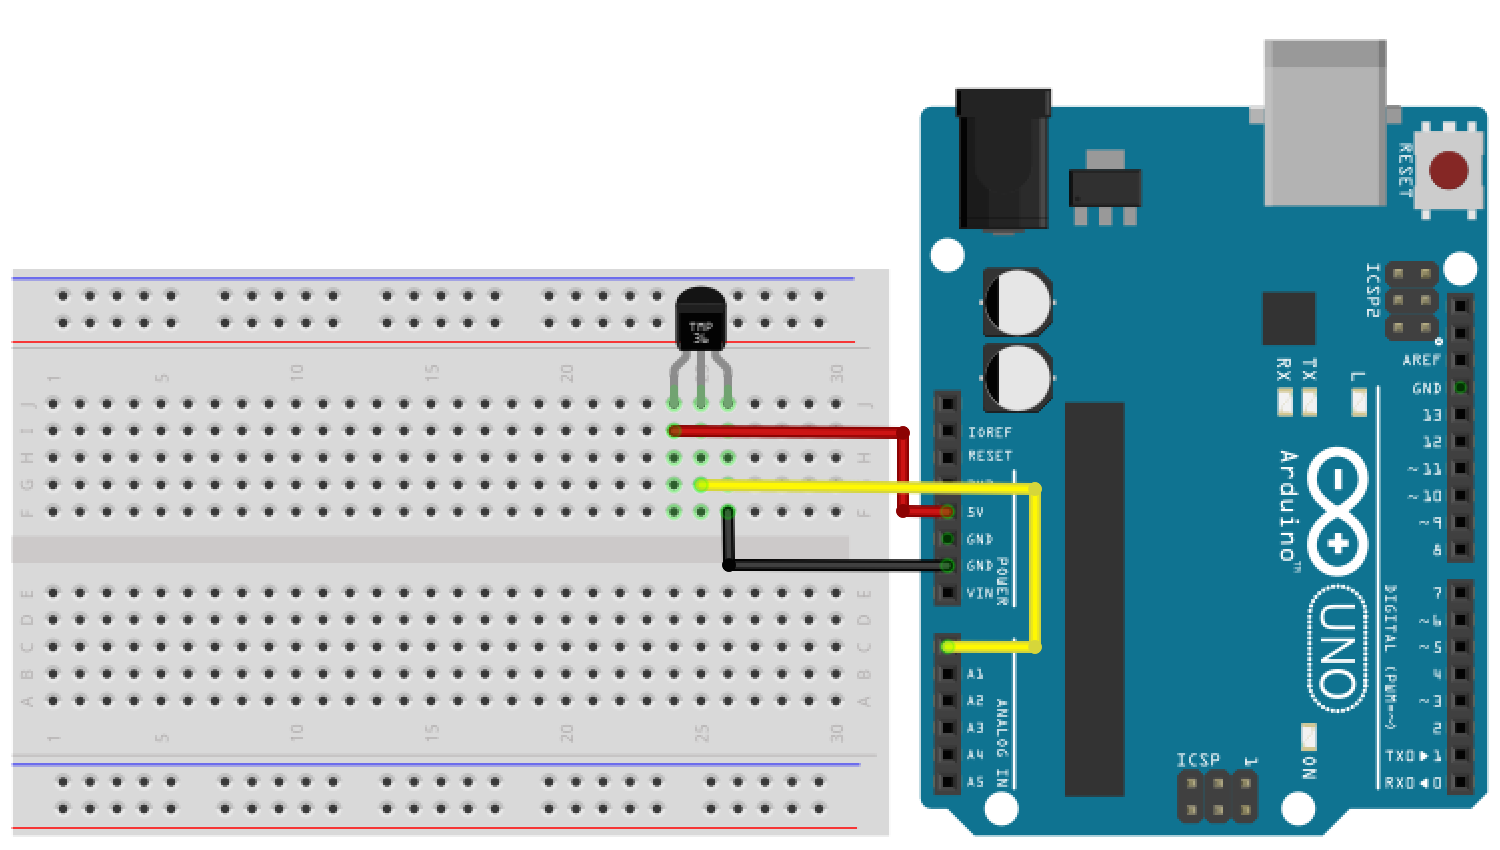

    2. Repeat the experiment from the previous section using a baud rate of 1200bps and a sampling rate of 100Hz, and store 
    your spreadsheet with the results

    3. As before, the time in-between acquired samples shouldn’t differ significantly from what we would expect, considering 
    the specified sampling rate

    4. Modify your sketch to send the values obtained from the ADC converted to ◦C as float; consider that the temperature 
    in ◦C is determined as: <br>
    C = (Vin −1/2)∗100, with Vin =(ADC/1023)∗5

    5. Repeat the experiment (maintaining the baud rate of 1200bps and a sampling rate of 100Hz) and compare the results

    6. You should be able to see that while in the first experiment (where only the 16−bit int values were being sent) the 
    MCU was able to comply with the data throughput and time constrains for which the acquisition was configured (as shown
    by the 10 milliseconds time in-between samples), in the second experiment just a simple change in one data type being
    streamed increased the throughput in such a way that the serial port speed was just too low to enable the MCU to 
    execute all the tasks in a timely manner (remember that float data types have 32 − bit)

<div style="background:#fe9b29;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Caution! </span> <br>
  <div style="background:#ffdab0;font-size:12px"> 
    BE CAREFUL when connecting the temperature sensor to the bread-
board; it has a specific position and CAN BE DAMAGED IF WRONGLY CONNECTED. Triple check your wiring before powering up the Arduino and check if the sensor is overheating.     
</div>

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    The temperature sensor used in this experiment is a TMP36 from
Analog Devices. You can obtain detailed information regarding this
sensor on its datasheet available at:
http://www.analog.com/media/en/technical-documentation/data-sheets/TMP35_36_37.pdf      
</div>

# III. Explore
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;">  1. Quiz </div>
1. Equally important to the control of certain settings on the device is reading its state. Add a feature to the 
    program developed in Section II.1. to allow sending a formatted string containing the currently configured sampling
    rate, upon request, based on a separate command sent by the computer(e.g. character C).
<br><br>
2. As you might have noticed in Section II.1., it may not be easy for a user to understand in which state your code is 
    currently at (e.g. acquiring or in standby), just by looking at the device. Modify your code in such a way that the
    builtin LED blinks when your code is in the standby state.
<br><br>
3. Modify the sketch you’ve created in Section II.2. to have an active time counting of the sampling interval instead 
    of using the delay function. Re- peat the experiment and compare the differences in results.
<br><br>
4. Write a sketch that prints to the serial port how much time does the function Serial.println() takes to complete 
    when writting a long variable. Use a spreadsheet software of your choice to determine the average time. Modify your 
    code to sample 4 analog inputs in addition to executing the Serial.println() and repeat your analysis. What can you 
    conclude from the gathered information?
<br><br>
5. Even though the analog values produced by the ADC have 10−bit resolution, they are usually stored in an integer type
    (int) variable, which has 16 − bit resolution. What is the data throughput (in bits per second) if your code is 
    streaming 6 channels at 1000Hz? Could we use that number directly as the baud rate for transmitting our data using 
    the serial port protocol?

<div style="height:100px; background:white;border-radius:10px;text-align:center"> 

<a> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/X.Example_Files/Images/IT.png?raw=true" alt="it" style=" bottom: 0; width:250px;
    display: inline;
    left: 250px;
    position: absolute;"/> </a>
<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/X.Example_Files/Images/ist.png?raw=true"
         alt="alternate text" 
         style="position: relative;   width:250px; float: left;
    position: absolute;
    display: inline;
    bottom: 0;
    right: 100;"/>
</div> 

<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> <a href="https://forms.gle/C8TdLQUAS9r8BNJM8">here</a>.</span></span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Prof. Hugo Silva; Joana Pinto```